In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [ ]:
artemis_preprocessed = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/artemis_preprocessed.csv')

In [ ]:
artemis_preprocessed

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded,emotion_label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,train,"['she', 'seems', 'very', 'happy', 'in', 'the',...",18,she seems very happy in the picture and you wa...,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",8
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,train,"['this', 'woman', 'has', 'really', 'knotty', '...",14,this woman has really knotty hands which makes...,"[1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",7
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,train,"['when', 'looking', 'at', 'this', 'woman', 'i'...",27,when looking at this woman i am filled with cu...,"[1, 32, 33, 34, 20, 21, 35, 36, 37, 38, 39, 40...",8
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,train,"['a', 'woman', 'looking', 'at', 'ease', 'peace...",15,a woman looking at ease peaceful and satisfied...,"[1, 45, 21, 33, 34, 48, 49, 11, 50, 51, 28, 52...",2
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,train,"['she', 'looks', 'like', 'a', 'lady', 'from', ...",33,she looks like a lady from that past that migh...,"[1, 4, 56, 30, 45, 57, 58, 59, 60, 59, 61, 62,...",1
...,...,...,...,...,...,...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48,train,"['the', 'collection', 'and', 'collage', 'of', ...",12,the collection and collage of different colors...,"[1, 9, 4867, 11, 4370, 89, 272, 78, 11, 83, 10...",1
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8,train,"['the', 'peaceful', 'reflections', 'of', 'the'...",14,the peaceful reflections of the moonlight on t...,"[1, 9, 49, 4037, 89, 9, 456, 43, 9, 269, 126, ...",1
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8,train,"['i', 'can', 'imagine', 'the', 'sailors', 'res...",13,i can imagine the sailors resting this peacefu...,"[1, 35, 149, 760, 9, 6361, 1942, 20, 49, 222, ...",3
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8,train,"['the', 'steep', 'mountains', 'and', 'the', 'm...",15,the steep mountains and the moonlight provide ...,"[1, 9, 2751, 894, 11, 9, 456, 292, 474, 14, 9,...",2


In [ ]:
painting_features_1000_subset = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/features_1000_subset.csv')

In [ ]:
painting_features_1000_subset['utterance'] = artemis_preprocessed_no_duplicate['utterance'][:1000]

In [ ]:
painting_features_1000_subset['utterance_spelled'] = artemis_preprocessed_no_duplicate['utterance_spelled'][:1000]

In [ ]:
painting_features_1000_subset['tokens_len'] = artemis_preprocessed_no_duplicate['tokens_len'][:1000]

In [ ]:
painting_features_1000_subset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label,utterance,utterance_spelled,utterance_spelled_model,tokens_len
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,img0.pkl,0.278422,0.527606,0.021193,1.104790,0.033097,0.149384,...,0.006962,0.031829,0.876327,1.170455,0.284816,8,"She seems very happy in the picture, and you w...",she seems very happy in the picture and you wa...,startseq she seems very happy in the picture a...,18
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,img1.pkl,0.106432,0.703795,0.000000,0.007888,0.015668,0.182670,...,0.197032,0.151990,0.000000,0.468789,0.256748,2,The bright colors make a very unique scene for...,the bright colors make a very unique scene for...,startseq the bright colors make a very unique ...,12
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,img2.pkl,0.151917,2.557872,0.826035,0.093906,0.009230,0.494370,...,0.902976,0.122635,0.026057,0.000000,0.046566,2,the stroke of blue paint used to outline the h...,the stroke of blue paint used to outline the h...,startseq the stroke of blue paint used to outl...,13
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe,img3.pkl,0.063078,1.351175,0.037122,0.448079,0.033715,0.117056,...,0.122929,0.000000,0.145163,1.442093,0.533309,2,The golden gloves and white dress stand out an...,the golden gloves and white dress stand out an...,startseq the golden gloves and white dress sta...,17
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment,img4.pkl,2.203687,0.367822,0.976512,0.472500,0.302199,0.152941,...,0.154419,0.874045,0.415222,3.152984,0.093512,3,The pears are just about ripe to eat and enjoy,the pears are just about ripe to eat and enjoy,startseq the pears are just about ripe to eat ...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Realism,vasily-vereshchagin_two-jews-1884,excitement,img995.pkl,0.017043,2.136100,0.044468,0.118175,0.509737,0.597605,...,0.985465,2.046885,0.104100,1.999464,0.612785,5,The men seem engaged in quite a lively discuss...,the men seem engaged in quite a lively discuss...,startseq the men seem engaged in quite a livel...,15
996,Realism,james-tissot_men-of-the-day-no-4-the-mob-rule-...,amusement,img996.pkl,1.255179,0.000000,1.611124,0.055478,1.011541,0.078781,...,0.479490,0.423200,0.713766,0.091844,2.059210,0,The cross-sided eyes make me laugh and this pe...,the cross sided eyes make me laugh and this pe...,startseq the cross sided eyes make me laugh an...,26
997,Impressionism,konstantin-korovin_on-the-square-1912,amusement,img997.pkl,0.000000,4.839285,0.158369,0.084149,0.087437,0.362394,...,0.549750,0.062910,0.000000,1.550344,0.015552,0,It looks to me like three very happy figures t...,it looks to me like three very happy figures t...,startseq it looks to me like three very happy ...,17
998,Post_Impressionism,vincent-van-gogh_zouave-sitting-whole-figure-1888,amusement,img998.pkl,0.082224,1.892309,0.065868,0.180113,0.583887,0.154840,...,0.880139,0.318111,2.336420,0.000000,0.000000,0,The figure is quite odd and I find their appea...,the figure is quite odd and i find their appea...,startseq the figure is quite odd and i find th...,12


In [ ]:
painting_features_1000_subset['utterance_spelled_model'] = ['startseq ' + x  + ' endseq' for x in painting_features_1000_subset['utterance_spelled']]

In [ ]:
artemis_2000_subset = artemis_preprocessed[:2000]

In [ ]:
artemis_2000_subset

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded,emotion_label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,train,"['she', 'seems', 'very', 'happy', 'in', 'the',...",18,she seems very happy in the picture and you wa...,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",8
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,train,"['this', 'woman', 'has', 'really', 'knotty', '...",14,this woman has really knotty hands which makes...,"[1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",7
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,train,"['when', 'looking', 'at', 'this', 'woman', 'i'...",27,when looking at this woman i am filled with cu...,"[1, 32, 33, 34, 20, 21, 35, 36, 37, 38, 39, 40...",8
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,train,"['a', 'woman', 'looking', 'at', 'ease', 'peace...",15,a woman looking at ease peaceful and satisfied...,"[1, 45, 21, 33, 34, 48, 49, 11, 50, 51, 28, 52...",2
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,train,"['she', 'looks', 'like', 'a', 'lady', 'from', ...",33,she looks like a lady from that past that migh...,"[1, 4, 56, 30, 45, 57, 58, 59, 60, 59, 61, 62,...",1
...,...,...,...,...,...,...,...,...,...,...,...
1995,Symbolism,nicholas-roerich_lahaul,awe,The interesting shape of buildings and a mello...,5,train,"['the', 'interesting', 'shape', 'of', 'buildin...",14,the interesting shape of buildings and a mello...,"[1, 9, 82, 609, 89, 118, 11, 45, 3231, 732, 51...",1
1996,Impressionism,camille-pissarro_the-hayymaker,something else,This is a simple black and white drawing.,6,train,"['this', 'is', 'a', 'simple', 'black', 'and', ...",8,this is a simple black and white drawing,"[1, 20, 17, 45, 1120, 216, 11, 121, 1495, 2, 0...",8
1997,Symbolism,mikhail-vrubel_roses-and-orchids-1894,contentment,A rosebush with cloud and open sky in the back...,5,train,"['a', 'rosebush', 'with', 'cloud', 'and', 'ope...",15,a rosebush with cloud and open sky in the back...,"[1, 45, 3232, 38, 686, 11, 524, 159, 8, 9, 128...",2
1998,Art_Nouveau_Modern,jules-cheret_hippodrome-de-la-porte-maillot-pa...,awe,The background colors behind the horse really ...,6,train,"['the', 'background', 'colors', 'behind', 'the...",19,the background colors behind the horse really ...,"[1, 9, 128, 78, 18, 9, 487, 23, 79, 71, 165, 3...",1


# **One hot encoding**

As the dataset has labels 0, 1...8. We need to convert them to one hot vector.

In [ ]:
labels = np.array(artemis_2000_subset['emotion_label'])


In [ ]:
print (labels)

[8 7 8 ... 2 1 2]


In [ ]:
import tensorflow as tf
labels = tf.keras.utils.to_categorical(labels, 9, dtype="float32")

In [ ]:
print (labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
len(labels)

2000

**Train, Test Split**

In [ ]:
# Train Test Split using Startified Sampling
# 80% - Training Data and 20% - Testing Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(artemis_2000_subset, labels, test_size = 0.2, 
                                                    random_state = 1, stratify = labels)
print (len(X_train),len(X_test),len(y_train),len(y_test))

1600 400 1600 400


In [ ]:
X_train

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded,emotion_label
488,Impressionism,julian-alden-weir_nassau-bahamas-1913,awe,The ocean scene is gorgeous in the way the gre...,6,train,"['the', 'ocean', 'scene', 'is', 'gorgeous', 'i...",15,the ocean scene is gorgeous in the way the gre...,"[1, 9, 793, 81, 17, 344, 8, 9, 84, 9, 246, 144...",1
1397,Impressionism,theodor-pallady_haystacks,contentment,The huts look like chocolate candies covered i...,6,train,"['the', 'huts', 'look', 'like', 'chocolate', '...",9,the huts look like chocolate candies covered i...,"[1, 9, 260, 29, 30, 662, 2647, 643, 8, 2648, 2...",2
1793,Abstract_Expressionism,william-baziotes_red-wall-1961,awe,"The eye is off-center, so that we encounter it...",5,train,"['the', 'eye', 'is', 'off', 'center', 'so', 't...",17,the eye is off center so that we encounter it ...,"[1, 9, 367, 17, 541, 1310, 168, 59, 1779, 2745...",1
871,Impressionism,francis-picabia_the-martigues,contentment,The water is lightly rippling near the dock,6,train,"['the', 'water', 'is', 'lightly', 'rippling', ...",8,the water is lightly rippling near the dock,"[1, 9, 269, 17, 1986, 1987, 696, 9, 1235, 2, 0...",2
1905,Abstract_Expressionism,sam-francis_upper-yellow-ii-lembark-l73-1964,contentment,The splashes of yellow and blue feel like they...,5,train,"['the', 'splashes', 'of', 'yellow', 'and', 'bl...",10,the splashes of yellow and blue feel like they...,"[1, 9, 3149, 89, 479, 11, 109, 54, 30, 239, 10...",2
...,...,...,...,...,...,...,...,...,...,...,...
180,Romanticism,orest-kiprensky_portrait-of-m-a-kikina-1816,contentment,The young woman is quite lovely and I apprecia...,6,train,"['the', 'young', 'woman', 'is', 'quite', 'love...",15,the young woman is quite lovely and i apprecia...,"[1, 9, 629, 21, 17, 154, 475, 11, 35, 156, 9, ...",2
1007,Romanticism,thomas-moran_amalfi-coast-1868,contentment,The coastline and the numerous plants along it...,6,train,"['the', 'coastline', 'and', 'the', 'numerous',...",22,the coastline and the numerous plants along it...,"[1, 9, 2155, 11, 9, 550, 453, 778, 71, 1696, 4...",2
72,Romanticism,orest-kiprensky_putto-with-a-globe,amusement,The little boy is trying to roll the globe aro...,6,train,"['the', 'little', 'boy', 'is', 'trying', 'to',...",13,the little boy is trying to roll the globe aro...,"[1, 9, 420, 212, 17, 105, 14, 421, 9, 422, 196...",0
1165,Impressionism,edmund-charles-tarbell_across-the-room-1899,awe,This bride looks like she needed to rest for a...,6,train,"['this', 'bride', 'looks', 'like', 'she', 'nee...",17,this bride looks like she needed to rest for a...,"[1, 20, 2374, 56, 30, 4, 2375, 14, 967, 73, 45...",1


In [ ]:
def load_clean_descriptions(df):
  descriptions = dict()
  for i in range(len(df)):
    image_id = df.iloc[i]['painting']
    image_desc = df.iloc[i]['utterance_spelled']
    if image_id not in descriptions:
      descriptions[image_id] = list()
    desc = 'startseq ' + image_desc + ' endseq'
    descriptions[image_id].append(desc)
  return descriptions

In [ ]:
train_descriptions = load_clean_descriptions(X_train)

In [ ]:
test_descriptions = load_clean_descriptions(X_test)

In [ ]:
# descriptions = dict()
# for i in range(len(artemis_2000_subset)):
#   image_id = artemis_2000_subset.iloc[i]['painting']
#   image_desc = artemis_2000_subset.iloc[i]['utterance_spelled']
#   if image_id not in descriptions:
#     descriptions[image_id] = list()
#   desc = 'startseq ' + image_desc + ' endseq'
#   descriptions[image_id].append(desc)

In [ ]:
len(artemis_2000_subset['painting'].unique())

1979

In [ ]:
import pickle
import numpy as np

X = []
for i in range(1979):
    with open(f'/content/drive/MyDrive/College/Sem 6/CV/Project/features/img{i}.pkl', 'rb') as f:
        data = pickle.load(f)
    X.append(data[0])

X = np.asarray(X)

In [ ]:
X.shape

(1979, 2048)

In [ ]:
features = {artemis_2000_subset['painting'].unique()[i]: X[i] for i in range(len(artemis_2000_subset['painting'].unique()))}

In [ ]:
features['vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890']

array([0.2784216 , 0.527606  , 0.02119292, ..., 0.8763272 , 1.1704551 ,
       0.28481564], dtype=float32)

In [ ]:
def load_photo_features(df, all_features):
  features = dict()
  for painting in df['painting'].unique():
    features[painting] = all_features[painting]
  return features

In [ ]:
train_features = load_photo_features(X_train, features)

In [ ]:
test_features = load_photo_features(X_test, features)

In [ ]:
train_unique_words = set()
for key in train_descriptions:
  utterances = train_descriptions[key]
  for utterance in utterances:
    for word in utterance.split(' '):
      train_unique_words.add(word)

In [ ]:
# unique_words = set()
# for utterance in painting_features_1000_subset['utterance_spelled_model']:
#     for word in utterance.split(' '):
#       unique_words.add(word)

In [ ]:
len(train_unique_words)

3171

In [ ]:
test_unique_words = set()
for key in test_descriptions:
  utterances = test_descriptions[key]
  for utterance in utterances:
    for word in utterance.split(' '):
      test_unique_words.add(word)

In [ ]:
len(test_unique_words)

1352

In [ ]:
too_long_len = np.percentile(artemis_2000_subset['tokens_len'], 100)

In [ ]:
too_long_len

68.0

In [ ]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

In [ ]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [ ]:
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

In [ ]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

In [ ]:
# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(2048,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

In [ ]:
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
max_length = max_length(train_descriptions)

In [ ]:
max_length

70

In [ ]:
vocab_size

3169

In [ ]:
# prepare sequences
# X1train, X2train, ytrain = create_sequences(create_tokenizer(train_descriptions), max_length(train_descriptions), train_descriptions, train_features, len(train_unique_words))

In [ ]:
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)

In [ ]:
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)

In [ ]:
# X1, X2, y = create_sequences(create_tokenizer(descriptions), max_length(descriptions), descriptions, features, 3548)

In [ ]:
len(X1train)

26481

In [ ]:
model = define_model(vocab_size, max_length)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 70, 256)      811264      ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_1[0][0]']                
                                                                                              

In [ ]:
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, verbose=1, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Epoch 1/20
828/828 [==============================] - ETA: 0s - loss: 5.3367
Epoch 1: val_loss improved from inf to 4.91436, saving model to model-ep001-loss5.337-val_loss4.914.h5
828/828 [==============================] - 306s 369ms/step - loss: 5.3367 - val_loss: 4.9144
Epoch 2/20
828/828 [==============================] - ETA: 0s - loss: 4.7723
Epoch 2: val_loss improved from 4.91436 to 4.61848, saving model to model-ep002-loss4.772-val_loss4.618.h5
828/828 [==============================] - 288s 347ms/step - loss: 4.7723 - val_loss: 4.6185
Epoch 3/20
828/828 [==============================] - ETA: 0s - loss: 4.3841
Epoch 3: val_loss improved from 4.61848 to 4.52182, saving model to model-ep003-loss4.384-val_loss4.522.h5
828/828 [==============================] - 278s 335ms/step - loss: 4.3841 - val_loss: 4.5218
Epoch 4/20
828/828 [==============================] - ETA: 0s - loss: 4.0765
Epoch 4: val_loss did not improve from 4.52182
828/828 [==============================] - 280s 3

# **Evaluate Model**

In [ ]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

In [ ]:
from numpy import argmax

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
  # seed the generation process
  in_text = 'startseq'
  # iterate over the whole length of the sequence
  for i in range(max_length):
    # integer encode input sequence
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    # pad input
    sequence = pad_sequences([sequence], maxlen=max_length)
    # predict next word
    # print([photo,sequence])
    yhat = model.predict([photo,sequence], verbose=0)
    # convert probability to integer
    yhat = argmax(yhat)
    # map integer to word
    word = word_for_id(yhat, tokenizer)
    # stop if we cannot map the word
    if word is None:
      break
    # append as input for generating the next word
    in_text += ' ' + word
		# stop if we predict the end of the sequence
    if word == 'endseq':
      break
  return in_text

In [ ]:
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

In [ ]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, np.array([photos[key]]), max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
np.array([test_features['laszlo-mednyanszky_angler-1890']])

array([[0.11662248, 0.31405002, 0.0572401 , ..., 0.7801989 , 0.03264289,
        0.00292518]], dtype=float32)

In [ ]:
# load the model
filename = 'model-ep002-loss3.245-val_loss3.612.h5'
model = load_model(filename)

In [ ]:
test_descriptions

In [ ]:
a = np.array(list(test_features.values()))

In [ ]:
a.shape

(399, 2048)

In [ ]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)



```
BLEU-1: 0.283648
BLEU-2: 0.142414
BLEU-3: 0.083636
BLEU-4: 0.033998
```



In [ ]:
test_descriptions['vincent-van-gogh_la-crau-1888']

['startseq its a sketch of a long and wide field where not much is happening endseq']

the trees are quite lovely and i find the way it is like the water


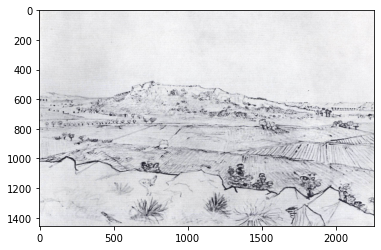

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
# creating a object
im = Image.open("/content/drive/MyDrive/College/Sem 6/CV/Project/wikiart/Post_Impressionism/vincent-van-gogh_la-crau-1888.jpg")
 
imshow(im)

print(' '.join(generate_desc(model, tokenizer, np.array([test_features['vincent-van-gogh_la-crau-1888']]), max_length).split(' ')[1:-1]))

In [ ]:
' '.join(generate_desc(model, tokenizer, np.array([test_features['vincent-van-gogh_la-crau-1888']]), max_length).split(' ')[1:-1])

'the trees are quite lovely and i find the way it is like the water'

# **Generate Caption for random image**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import decode_predictions
from keras.applications.resnet import ResNet50
from keras.models import Model
from pickle import dump

image_path = f"/content/drive/MyDrive/College/Sem 6/CV/Project/starry_night.jpeg"
image = load_img(image_path, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = ResNet50()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features = model.predict(image)
if i % 500 == 0:
  print(features.shape)
# save to file
dump(features, open(f'/content/drive/MyDrive/College/Sem 6/CV/Project/starry_night.pkl', 'wb'))

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
path = "/content/drive/MyDrive/College/Sem 6/CV/Project/starry_night.jpeg"
path.split('/')[-1].split('.')[0]

'starry_night'

In [ ]:
with open(f'/content/drive/MyDrive/College/Sem 6/CV/Project/Random Caption Generations/starry_night.pkl', 'rb') as f:
  data = pickle.load(f)

In [ ]:
data

array([[0.12275859, 1.1882615 , 0.31884986, ..., 0.        , 0.41195327,
        0.30720192]], dtype=float32)

In [ ]:
np.array([test_features['vincent-van-gogh_la-crau-1888']])

array([[0.29857787, 0.00343432, 0.        , ..., 0.17570846, 0.03945144,
        0.24450475]], dtype=float32)

In [ ]:
data.shape

(1, 2048)

In [ ]:
np.array([test_features['vincent-van-gogh_la-crau-1888']]).shape

(1, 2048)

In [ ]:
' '.join(generate_desc(model, tokenizer, data, max_length).split(' ')[1:-1])

'the man is quite lovely and i find the way it is like a lot of the way'

In [ ]:
def save_image_to_pkl(image_path):
  image_name_with_type = image_path.split('/')[-1]
  image_name = image_name_with_type.split('.')[0]
  image = load_img(image_path, target_size=(224, 224))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)
  # load model
  model = ResNet50()
  # remove the output layer
  model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
  # get extracted features
  features = model.predict(image)
  # save to file
  pkl_path = f'/content/drive/MyDrive/College/Sem 6/CV/Project/Random Caption Generations/{image_name}.pkl'
  dump(features, open(pkl_path, 'wb'))
  return pkl_path

In [ ]:
def get_features(pkl_path):
  with open(pkl_path, 'rb') as f:
    data = pickle.load(f)
  return data

In [ ]:
def generate_caption(data):
  caption = ' '.join(generate_desc(model, tokenizer, data, max_length).split(' ')[1:-1])
  return caption

In [ ]:
path = save_image_to_pkl('/content/drive/MyDrive/College/Sem 6/CV/Project/Random Caption Generations/the_scream.jpeg')

In [ ]:
path

'/content/drive/MyDrive/College/Sem 6/CV/Project/Random Caption Generations/sir.pkl'

In [ ]:
data = get_features(path)

In [ ]:
generate_caption(data)

'the woman is quite lovely in the way she is quite lovely and i find the man'

**Trying other model**

In [ ]:
# load the model
filename = '/content/model-ep003-loss4.384-val_loss4.522.h5'
model = load_model(filename)

In [ ]:
a = np.array(list(test_features.values()))

In [ ]:
a.shape

(399, 2048)

In [ ]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.283648
BLEU-2: 0.142414
BLEU-3: 0.083636
BLEU-4: 0.033998


In [ ]:
path = save_image_to_pkl('/content/drive/MyDrive/College/Sem 6/CV/Project/Random Caption Generations/almond_blossom.jpeg')

In [ ]:
data = get_features(path)

In [ ]:
generate_caption(data)

'the man is quite lovely and i find the way it is like a lot of the water'

# **Rough Work**

In [ ]:
data = np.array(painting_features_1000_subset['utterance_spelled'])

In [ ]:
data

array([[1.1200637 , 1.6651758 , 0.35291988, ..., 0.25827467, 1.542104  ,
        0.5236593 ]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 2370
max_len = 63

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
utterances = pad_sequences(sequences, maxlen=max_len)
print(utterances)

[[   0    0    0 ...  418    1  236]
 [   0    0    0 ...    1  136  507]
 [   0    0    0 ...    6    1   45]
 ...
 [   0    0    0 ...   33    4 2366]
 [   0    0    0 ...  130   12  325]
 [   0    0    0 ...    4  172  196]]
